In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore', category=FutureWarning)

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata
sdata

SpatialData object with:
├── Images
│     ├── 'clahe': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'raw_image': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tiling_correction': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tophat_filtered': SpatialImage[cyx] (1, 12864, 10720)
│     └── 'transcript_density': SpatialImage[cyx] (1, 12864, 10720)
├── Labels
│     └── 'segmentation_mask': SpatialImage[yx] (12864, 10720)
├── Points
│     └── 'transcripts': DataFrame with shape: (4754932, 3) (2D points)
├── Shapes
│     ├── 'expanded_cells20': GeoDataFrame shape: (11228, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_segmentation': GeoDataFrame shape: (50, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_size': GeoDataFrame shape: (280, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_boundaries_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_

In [3]:
# Do score_genes with basic marker gene list
mg_dict, scoresper_cluster = score_genes_bins(
    sdata=sdata,
    path_marker_genes="/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",
    bins = 25)

/home/wout/mambaforge/envs/napari-sparrow/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


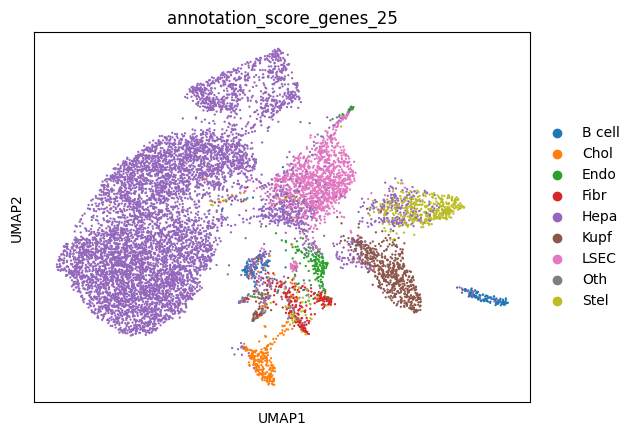

Hepa      0.702708
LSEC      0.108123
Kupf      0.057535
Stel      0.045778
Chol      0.024849
Fibr      0.021197
B cell    0.018792
Endo      0.016833
Oth       0.004186
Name: annotation_score_genes_25, dtype: float64
categories: B cell, Chol, Endo, etc.
var_group_labels: hepa, hepa_chol_stel_fibr_oth, hepa, etc.


/home/wout/mambaforge/envs/napari-sparrow/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


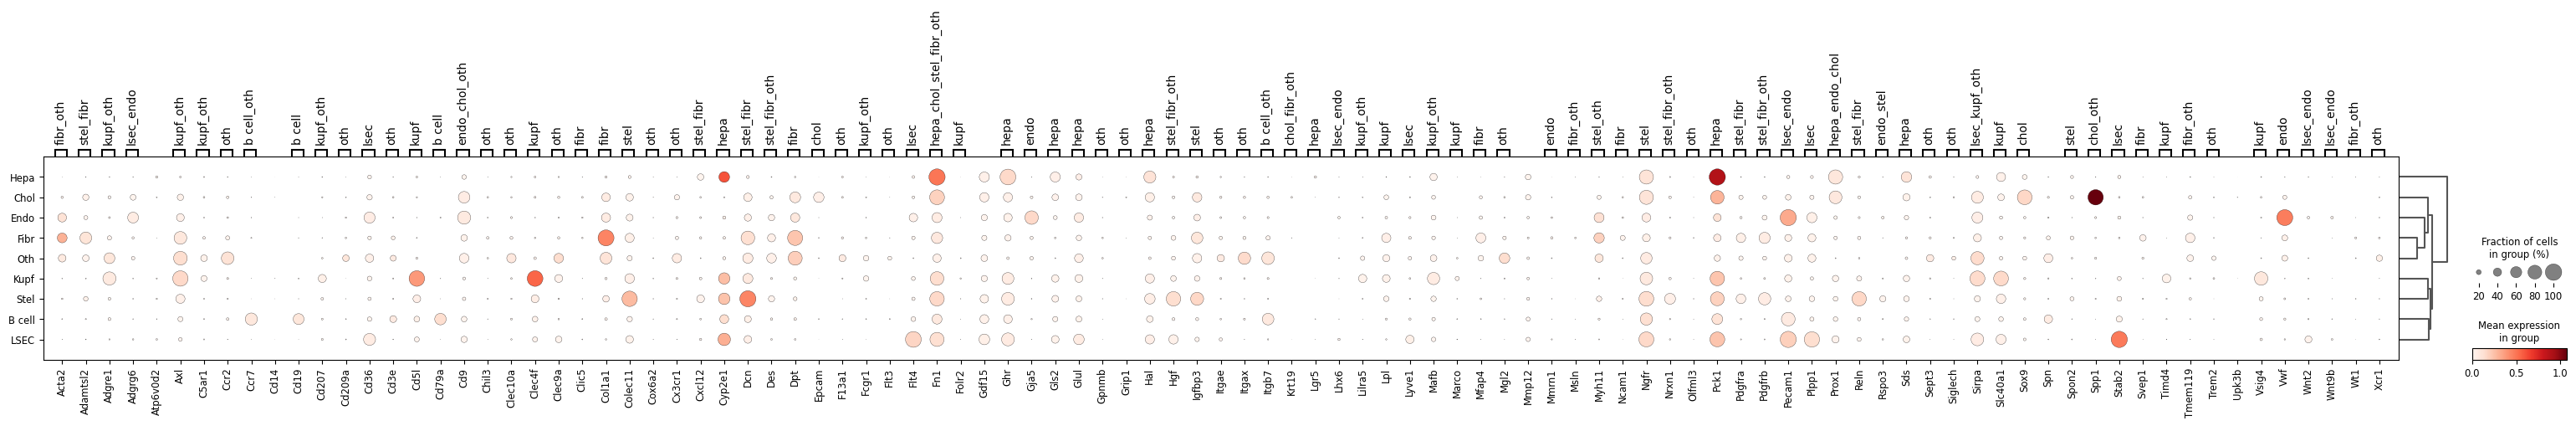

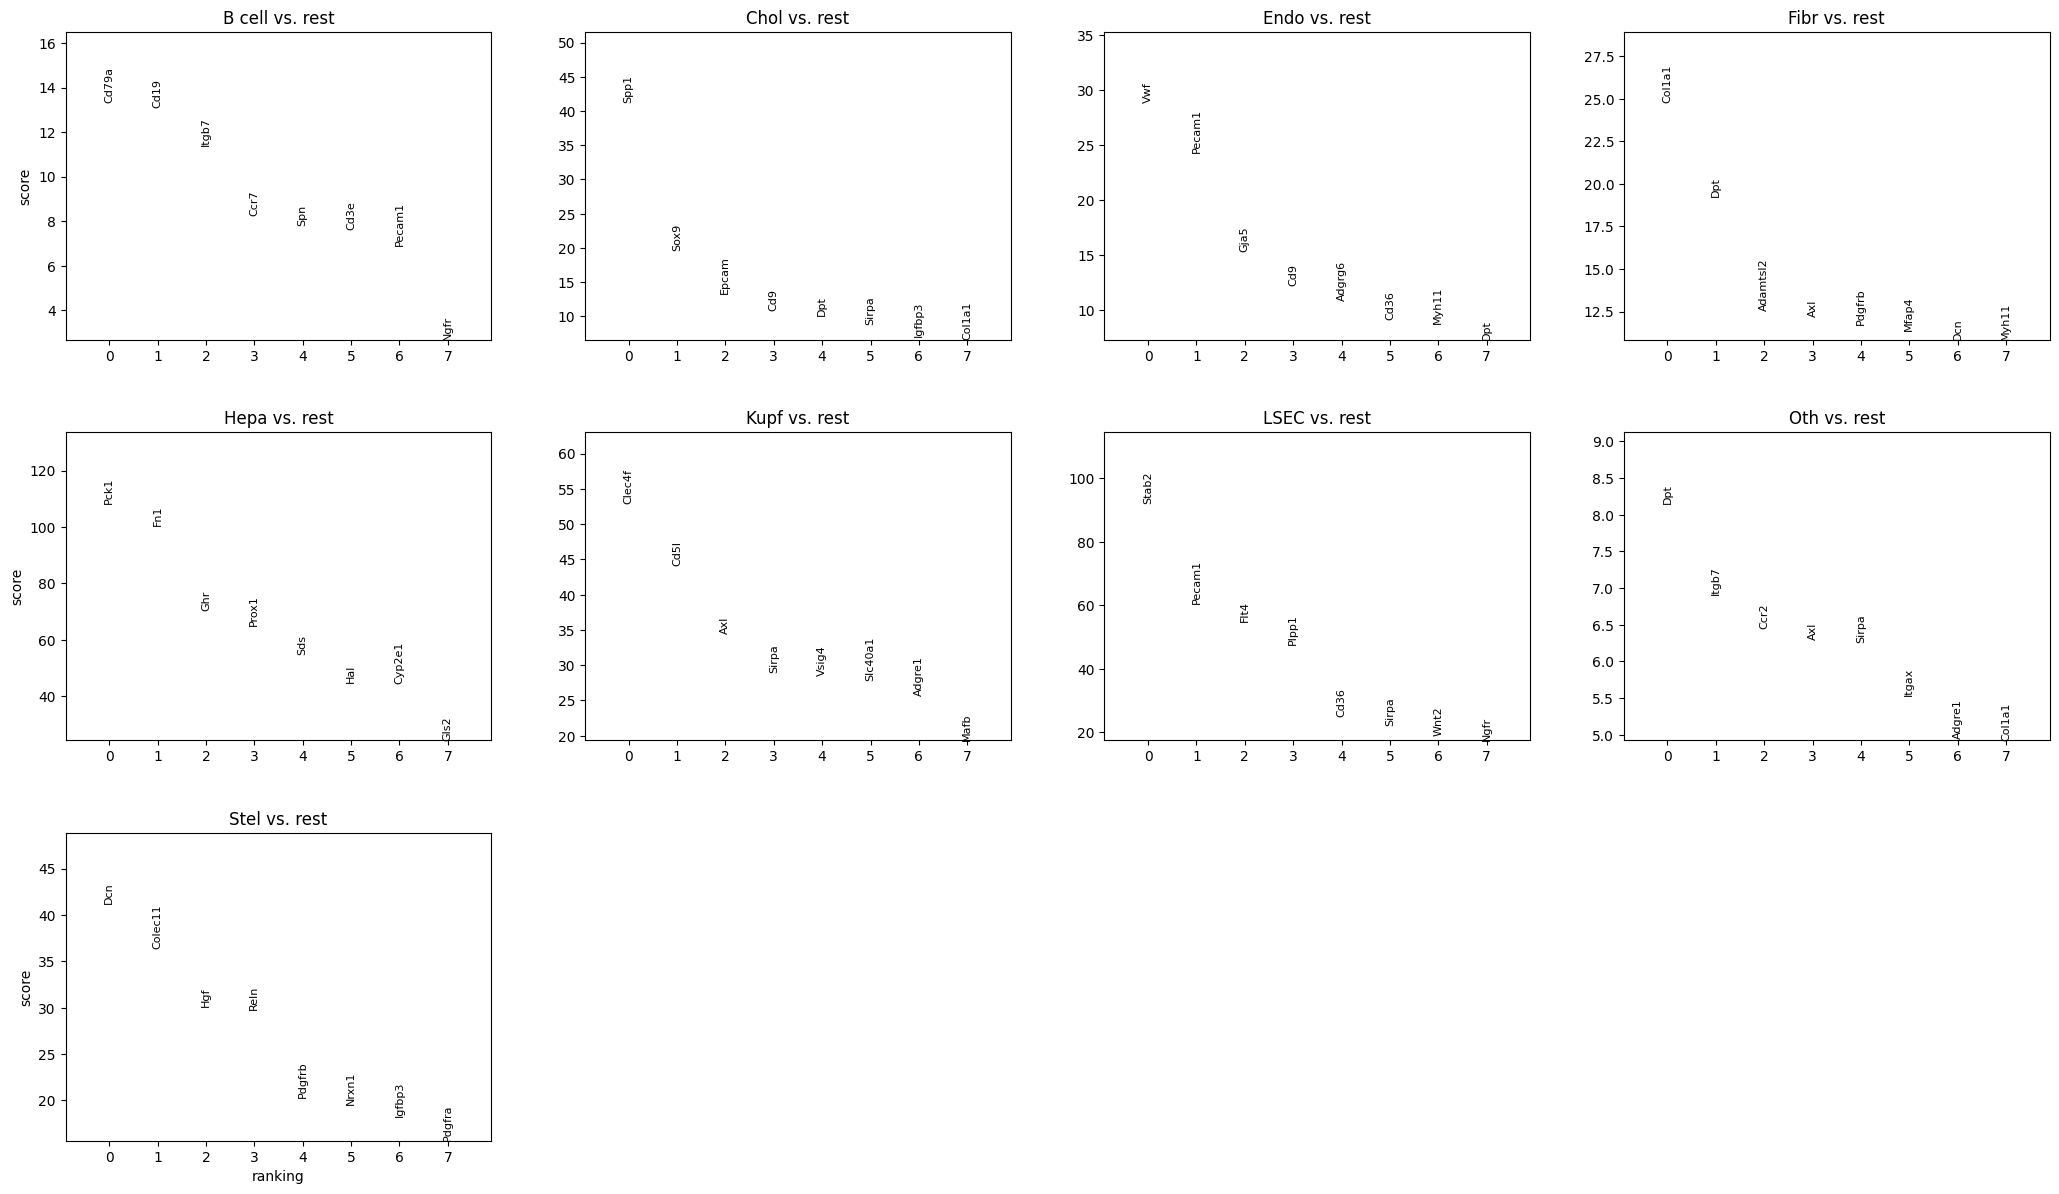

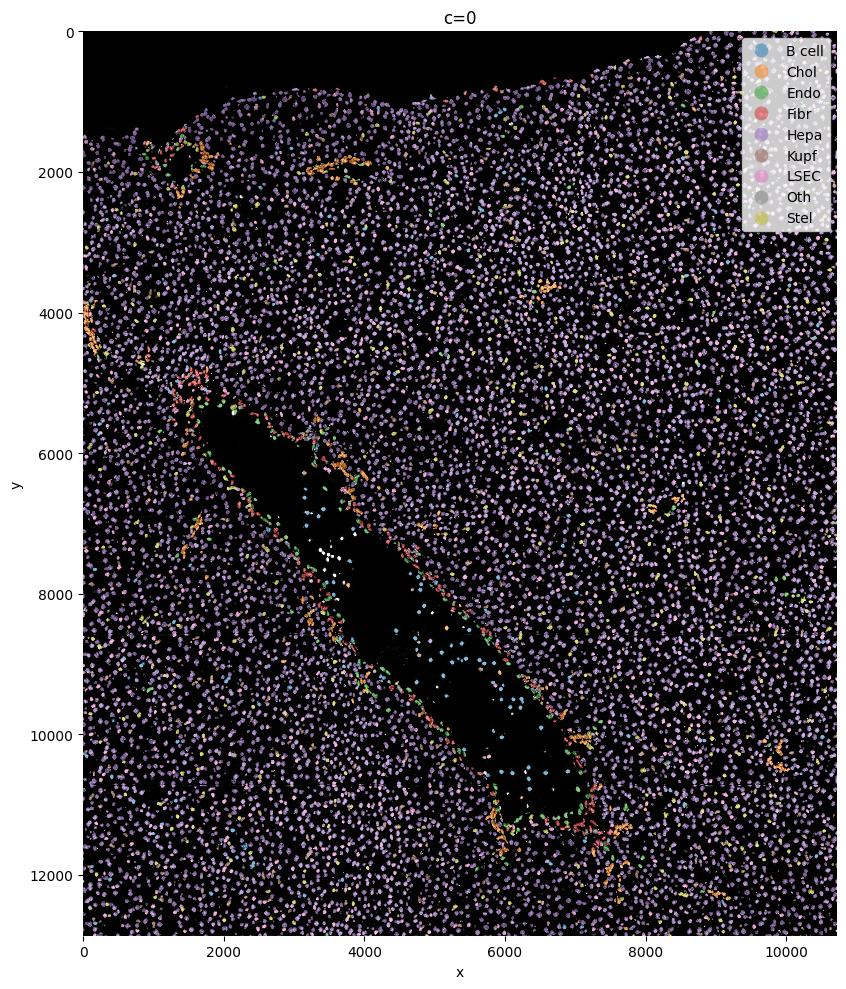

In [4]:
visualize_classification(sdata,'annotation_score_genes_25')

/home/wout/mambaforge/envs/napari-sparrow/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


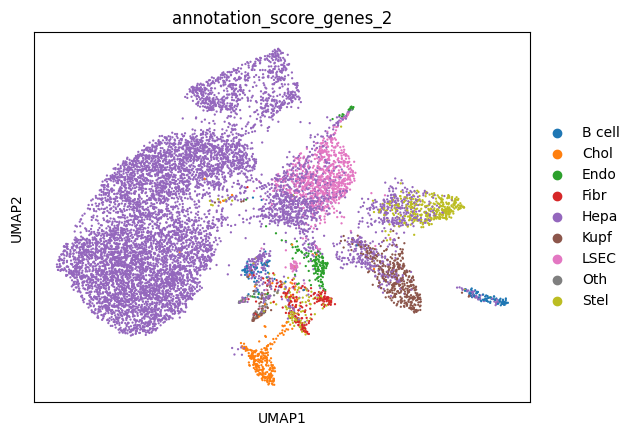

Hepa      0.763538
LSEC      0.075882
Kupf      0.042216
Stel      0.041949
Chol      0.025027
Fibr      0.016833
B cell    0.015319
Endo      0.014339
Oth       0.004898
Name: annotation_score_genes_2, dtype: float64


ValueError: columns overlap but no suffix specified: Index(['Hepa', 'LSEC', 'Endo', 'Chol', 'Kupf', 'Stel', 'Fibr', 'B cell',
       'Oth'],
      dtype='object')

In [5]:
# Play around with bins in score_genes function (default = 25, the one above)
bins = [2,10,40,67]
for bin in bins:
    score_genes_bins(
        sdata = sdata,
        path_marker_genes = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",
        bins = bin)
    visualize_classification(sdata,'annotation_score_genes_'+str(bin))

In [ ]:
sdata 

SpatialData object with:
├── Images
│     ├── 'clahe': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'raw_image': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tiling_correction': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tophat_filtered': SpatialImage[cyx] (1, 12864, 10720)
│     └── 'transcript_density': SpatialImage[cyx] (1, 12864, 10720)
├── Labels
│     └── 'segmentation_mask': SpatialImage[yx] (12864, 10720)
├── Points
│     └── 'transcripts': DataFrame with shape: (4754932, 3) (2D points)
├── Shapes
│     ├── 'expanded_cells20': GeoDataFrame shape: (11228, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_segmentation': GeoDataFrame shape: (50, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_size': GeoDataFrame shape: (280, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_boundaries_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_

In [ ]:
sdata.table.X

array([[-0.11445902, -0.15354791, -0.21201125, ..., -0.07536249,
        -0.05688104, -0.06758364],
       [-0.11445902, -0.15354791, 10.        , ..., -0.07536249,
        -0.05688104, -0.06758364],
       [-0.11445902,  0.7611513 , -0.21201125, ..., -0.07536249,
        10.        , -0.06758364],
       ...,
       [-0.11445902, -0.15354791, -0.21201125, ..., -0.07536249,
        -0.05688104, -0.06758364],
       [-0.11445902, -0.15354791, -0.21201125, ..., -0.07536249,
        -0.05688104, -0.06758364],
       [-0.11445902, -0.15354791,  1.9620423 , ..., -0.07536249,
        -0.05688104, -0.06758364]])